### **Análise exploratória**


A base de dados utilizada nesta fase contém registros clínicos de pacientes  com alguns sintomas e dados do sangue. O objetivo aqui nesta fase será tentar prever por meio da rede neural quando um paciente está propenso a ter doença cardíaca ou não. Essa predição servirá para melhorar a triagem dos paciente e tornar o atendimento de um hospital melhor. Desse modo, vamos analisar algumas features antes.

In [ ]:
import pandas as pd
Dados = pd.read_csv('/content/drive/MyDrive/heart.csv')
Dados

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


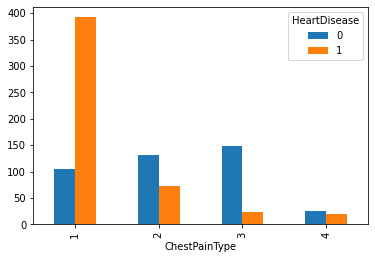

In [ ]:
pd.crosstab([Dados['ChestPainType']], Dados['']).plot.bar()

In [ ]:
Dados.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,1.748366,132.396514,198.799564,0.233115,0.592593,136.809368,0.404139,0.887364,0.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.793670,25.460334,0.490992,1.066570,0.802449,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,0.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
Dados['ChestPainType'] = Dados['ChestPainType'].replace({'ASY':1,'NAP':2,'ATA':3,'TA':4}).astype(int)
Dados['RestingECG'] = Dados['RestingECG'].replace({'Normal':0,'LVH':1,'ST':2}).astype(int)
Dados['ST_Slope'] = Dados['ST_Slope'].replace({'Flat':0,'Up':1,'Normal':2,'Down':3}).astype(int)
Dados['ExerciseAngina'] = Dados['ExerciseAngina'].replace({'N':0,'Y':1}).astype(int)
Dados['Sex'] = Dados['Sex'].replace({'F':0,'M':1})
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [ ]:
from sklearn.model_selection import train_test_split
treino, teste = train_test_split(Dados, train_size=0.8)

Dividindo a base de dados em 80% treino e 20% teste.

In [ ]:
import tensorflow
from tensorflow import keras

nn = keras.Sequential([
      keras.layers.Input(len(treino.columns)-1),
      keras.layers.Dense(3, activation='relu'),
      keras.layers.Dense(3, activation='relu'),
      keras.layers.Dense(3, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam' , loss='binary_crossentropy')
nn.fit(treino[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']] , treino['HeartDisease'])

23/23 [==============================] - 1s 3ms/step - loss: 3.1212


Aqui foi criada uma rede neural com 11 camadas de entrada (todas as features menos a variável alvo) e três camadas internas, cada uma com três neurônios. Além disso, temos a camada de saída que corresponde a caracterização ou não da espécie sargo naquele registro. Logo, por ser uma saída binária a sua função de ativação é sigmoide. Criadas as características da rede neural, realizamos o fit com as features e a variável target. Feito isso, podemos partir para as previsões.

In [ ]:
prevs_t = nn.predict(treino[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']] )
prevs_t[:10]

array([[0.99996686],
       [0.98092276],
       [0.98500633],
       [0.99982697],
       [0.99519145],
       [0.99982905],
       [0.7541456 ],
       [0.87445986],
       [0.82315314],
       [0.49436164]], dtype=float32)

In [ ]:
p_treino = [0 if i < 0.965 else 1 for i in prevs_t]
p_treino[:10]

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

Após alguns testes, determinamos que o limiar de ativação mais eficaz seria 0.994. Esse limiar é a condição final que transforma as saídas das previsões da rede neural em variáveis booleanas (que é a caracterização da espécie sargo naquele registro).

In [ ]:
y_treino = treino['HeartDisease']
y_treino

321    1
722    1
902    0
309    1
876    1
      ..
502    1
465    0
917    0
247    1
286    0
Name: HeartDisease, Length: 734, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_treino,p_treino)*100

66.21253405994551

Como podemos observar, uma acurácia de treino equivalente à 88% é muito bem vinda, pois a rede neural conseguiu diferenciar bem a espécie sargo de outras espécies. Agora iremos partir para as previsões de teste.

In [ ]:
p_teste = []
previsoes = nn.predict(teste[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']] )
p_teste.extend([0 if i < 0.965 else 1 for i in previsoes])

In [ ]:
y_teste = teste['HeartDisease']
y_teste

147    0
483    1
462    1
888    1
695    1
      ..
53     0
810    0
250    1
338    1
87     0
Name: HeartDisease, Length: 184, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste,p_teste) * 100

70.65217391304348

A acurácia se manteve equivalente à de treino (com uma redução de 4%). Essa redução não é significativa a ponto de caracterizar um overfit. Desse modo, é possível concluir que a rede neural conseguiu associar muito bem as características físicas da espécie em treino e teste, mostrando que ela é confiável.

[[54 25]
 [29 76]]


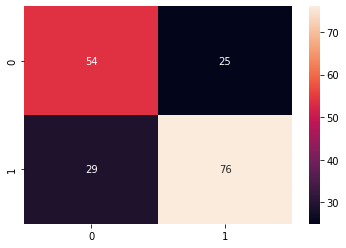

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm = confusion_matrix(y_teste , p_teste)
print(cm)
sns.heatmap(cm, annot=True)

Aqui é possivel ver que o modelo possui uma boa quantidade de acertos. A grande quantidade de TN é muito bem vinda pois a maioria dos registros não são de sargos, então é possível concluir mais uma vez que o modelo classificou bem. Além disso, o número de TP é maior que o de FN E FP, o que mostra mais uma vez a boa capacidade da rede que criamos de diferenciar essa espécie das outras.

In [ ]:
print(classification_report(y_teste,p_teste))

              precision    recall  f1-score   support

           0       0.49      0.74      0.59        76
           1       0.71      0.46      0.56       108

    accuracy                           0.58       184
   macro avg       0.60      0.60      0.58       184
weighted avg       0.62      0.58      0.57       184



Temos também o indicativo de que a precisão da rede em classificar espécies que não são sargos é bem maior do que classificar os sargos (96% e 56% respectivamente). Contudo, é de chamar a atenção o alto recall que os classificados como sargos possuem (0.83). Isso mostra que de fato o modelo associou bem as regras de classificação.

**Conslusão de negócio**

- Se tratando de um contexto real, a rede neural que criamos dificilmente pode ser aplicada. A classificação de uma espécie de peixe com base apenas em atributos físicos ainda perde para uma classificação a olho nú, já que se o observador tiver experiência com isso, uma análise da fisiologia do animal é suficiente para uma diferenciação da espécie.
- É até possível enxergar um cenário em que um pescador usa algum aplicativo para cadastrar os peixes que pescou e seus atributos físicos para que as espécies pescadas fossem contadas automaticamente, mas mesmo assim ainda é algo trabalhoso de se fazer para o usuário e portanto se distancia da realidade. Além disso, também é possível enxergar um cenário em que esse modelo seja aplicada à um contexto de pesquisa científica, mesmo que seja algo muito específico.
- Apesar de todas as observações feitas acima, a rede neural que elaboramos surpreende em ter uma boa eficácia na classificação desses atributos físicos (mesmo que sejam poucos). Sendo assim, ela cumpre o seu objetivo como rede neural, que é de relacionar as features que são dadas a ela e fazer previsões com um certo grau de confiança. Logo, é possível concluir que de fato a rede cumpre o objetivo que damos a ela de classificação, mesmo que seja difícil encaixá-la em um cenário real de aplicação de negócio.